<a href="https://colab.research.google.com/github/RuaanV/datascience-notebook/blob/master/rnn_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch torchvision

    100% |████████████████████████████████| 591.8MB 28kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x60eb0000 @  0x7f2d8c78e2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 25.1MB/s 
    100% |████████████████████████████████| 2.0MB 7.3MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np

In the code below, We have implemented a simple one layer, one neuron RNN and then initialized two weight matrices, Wx and Wy with values from a normal distribution. Wxcontains connection weights for the inputs of the current time step, while Wy contains connection weights for the outputs of the previous time step. We also added a bias b. The forward function computes two outputs — one for each time step (two overall). Note that we are using tanh as the non-linearity (activation function) via torch.tanh(...).

As for the input, we are providing 4 instances, with each instance containing two input sequences.

In [0]:

class SingleRNN(nn.Module):
    def __init__(self, n_inputs, n_neurons):
        super(SingleRNN, self).__init__()
        
        self.Wx = torch.randn(n_inputs, n_neurons) # 4 X 1
        self.Wy = torch.randn(n_neurons, n_neurons) # 1 X 1
        
        self.b = torch.zeros(1, n_neurons) # 1 X 4
    
    def forward(self, X0, X1):
        self.Y0 = torch.tanh(torch.mm(X0, self.Wx) + self.b) # 4 X 1
        
        self.Y1 = torch.tanh(torch.mm(self.Y0, self.Wy) +
                            torch.mm(X1, self.Wx) + self.b) # 4 X 1
        
        return self.Y0, self.Y1

In [6]:
N_INPUT = 4
N_NEURONS = 1

X0_batch = torch.tensor([[0,1,2,0], [3,4,5,0], 
                         [6,7,8,0], [9,0,1,0]],
                        dtype = torch.float) #t=0 => 4 X 4

X1_batch = torch.tensor([[9,8,7,0], [0,0,0,0], 
                         [6,5,4,0], [3,2,1,0]],
                        dtype = torch.float) #t=1 => 4 X 4

model = SingleRNN(N_INPUT, N_NEURONS)

Y0_val, Y1_val = model(X0_batch, X1_batch)
print(Y0_val)
print(Y1_val)

tensor([[-0.1369],
        [ 0.4721],
        [ 0.8221],
        [-0.9979]])
tensor([[ 0.9769],
        [-0.4353],
        [ 0.5556],
        [ 0.9441]])


In [0]:
class BasicRNN(nn.Module):
    def __init__(self, n_inputs, n_neurons):
        super(SingleRNN, self).__init__()
        
        self.Wx = torch.randn(n_inputs, n_neurons) # n_inputs X n_neurons
        self.Wy = torch.randn(n_neurons, n_neurons) # n_neurons X n_neurons
        
        self.b = torch.zeros(1, n_neurons) # 1 X n_neurons
    
    def forward(self, X0, X1):
        self.Y0 = torch.tanh(torch.mm(X0, self.Wx) + self.b) # batch_size X n_neurons
        
        self.Y1 = torch.tanh(torch.mm(self.Y0, self.Wy) +
                            torch.mm(X1, self.Wx) + self.b) # batch_size X n_neurons
        
        return self.Y0, self.Y1

In [9]:

N_INPUT = 3 # number of features in input
N_NEURONS = 5 # number of units in layer

X0_batch = torch.tensor([[0,1,2], [3,4,5], 
                         [6,7,8], [9,0,1]],
                        dtype = torch.float) #t=0 => 4 X 3

X1_batch = torch.tensor([[9,8,7], [0,0,0], 
                         [6,5,4], [3,2,1]],
                        dtype = torch.float) #t=1 => 4 X 3

model = SingleRNN(N_INPUT, N_NEURONS)

Y0_val, Y1_val = model(X0_batch, X1_batch)
print(Y0_val)
print(Y1_val)

tensor([[-0.8397,  0.8866, -0.9894,  0.8325, -0.9462],
        [-0.2514,  1.0000, -1.0000,  0.9968, -0.9974],
        [ 0.6084,  1.0000, -1.0000,  0.9999, -0.9999],
        [ 0.9999,  1.0000, -1.0000,  0.9922,  1.0000]])
tensor([[ 0.9945,  1.0000, -1.0000,  0.9950, -1.0000],
        [-0.7905, -0.5844, -0.9682, -0.9844, -0.9996],
        [ 0.9769,  1.0000, -1.0000, -0.1615, -0.9999],
        [ 0.9775,  1.0000, -1.0000,  0.0738,  0.9179]])


In [10]:

rnn = nn.RNNCell(3, 5) # n_input X n_neurons

X_batch = torch.tensor([[[0,1,2], [3,4,5], 
                         [6,7,8], [9,0,1]],
                        [[9,8,7], [0,0,0], 
                         [6,5,4], [3,2,1]]
                       ], dtype = torch.float) # X0 and X1

hx = torch.randn(4, 5) # m X n_neurons
output = []

# for each time step
for i in range(2):
    hx = rnn(X_batch[i], hx)
    output.append(hx)

print(output)

[tensor([[-0.8905, -0.3160,  0.6791,  0.7422, -0.8443],
        [-0.9922, -0.9870,  0.9503,  0.9000,  0.1986],
        [-1.0000, -0.9976,  0.9936,  0.8377, -0.4202],
        [-0.8506, -0.9098, -0.9073, -0.9690,  0.7708]], grad_fn=<TanhBackward>), tensor([[-1.0000, -0.9989,  0.5432,  0.8412, -0.4607],
        [ 0.0749,  0.6304, -0.0047, -0.0063, -0.8149],
        [-0.9982, -0.9528,  0.1537,  0.4814, -0.6706],
        [-0.7787, -0.6141, -0.5559,  0.7815, -0.1800]], grad_fn=<TanhBackward>)]


In [11]:

class CleanBasicRNN(nn.Module):
    def __init__(self, batch_size, n_inputs, n_neurons):
        super(CleanBasicRNN, self).__init__()
        
        rnn = nn.RNNCell(n_inputs, n_neurons)
        self.hx = torch.randn(batch_size, n_neurons) # initialize hidden state
        
    def forward(self, X):
        output = []

        # for each time step
        for i in range(2):
            self.hx = rnn(X[i], self.hx)
            output.append(self.hx)
        
        return output, self.hx

FIXED_BATCH_SIZE = 4 # our batch size is fixed for now
N_INPUT = 3
N_NEURONS = 5

X_batch = torch.tensor([[[0,1,2], [3,4,5], 
                         [6,7,8], [9,0,1]],
                        [[9,8,7], [0,0,0], 
                         [6,5,4], [3,2,1]]
                       ], dtype = torch.float) # X0 and X1


model = CleanBasicRNN(FIXED_BATCH_SIZE, N_INPUT, N_NEURONS)
output_val, states_val = model(X_batch)
print(output_val) # contains all output for all timesteps
print(states_val) # contains values for final state or final timestep, i.e., t=1

[tensor([[-0.3204, -0.4012,  0.6202,  0.8404, -0.4724],
        [-0.9980, -0.9864,  0.9469,  0.5251, -0.7847],
        [-0.9999, -0.9968,  0.9083,  0.9485, -0.6682],
        [-0.8510, -0.6592, -0.9730, -0.8843,  0.5244]], grad_fn=<TanhBackward>), tensor([[-1.0000, -0.9990,  0.7443,  0.7068, -0.3442],
        [-0.2685,  0.2954, -0.4165,  0.3330, -0.9182],
        [-0.9983, -0.9639,  0.0180,  0.5306, -0.7116],
        [-0.7671, -0.7217, -0.6122,  0.8146, -0.1724]], grad_fn=<TanhBackward>)]
tensor([[-1.0000, -0.9990,  0.7443,  0.7068, -0.3442],
        [-0.2685,  0.2954, -0.4165,  0.3330, -0.9182],
        [-0.9983, -0.9639,  0.0180,  0.5306, -0.7116],
        [-0.7671, -0.7217, -0.6122,  0.8146, -0.1724]], grad_fn=<TanhBackward>)


In [14]:
x = torch.randn(2, 3)
print(x)

torch.cat((x, x, x), 0)

tensor([[-0.9738, -0.9008,  1.5615],
        [-1.8704, -0.7643, -0.5802]])


tensor([[-0.9738, -0.9008,  1.5615],
        [-1.8704, -0.7643, -0.5802],
        [-0.9738, -0.9008,  1.5615],
        [-1.8704, -0.7643, -0.5802],
        [-0.9738, -0.9008,  1.5615],
        [-1.8704, -0.7643, -0.5802]])

Image Classification - using the MNIST image dataset

In [16]:

import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 64

# list all transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

# download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

# download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,shuffle=False, num_workers=2)


Processing...
Done!


View the MNIST dataset

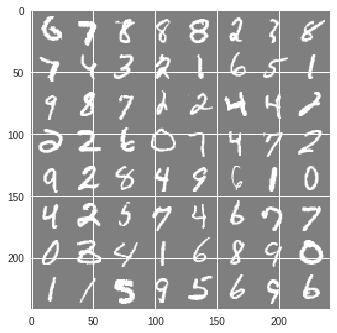

In [18]:

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [0]:
# parameters 
N_STEPS = 28
N_INPUTS = 28
N_NEURONS = 150
N_OUTPUTS = 10
N_EPHOCS = 10

In [0]:

class ImageRNN(nn.Module):
    def __init__(self, batch_size, n_steps, n_inputs, n_neurons, n_outputs):
        super(ImageRNN, self).__init__()
        
        self.n_neurons = n_neurons
        self.batch_size = batch_size
        self.n_steps = n_steps
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        
        self.basic_rnn = nn.RNN(self.n_inputs, self.n_neurons) 
        
        self.FC = nn.Linear(self.n_neurons, self.n_outputs)
        
    def init_hidden(self,):
        # (num_layers, batch_size, n_neurons)
        return (torch.zeros(1, self.batch_size, self.n_neurons))
        
    def forward(self, X):
        # transforms X to dimensions: n_steps X batch_size X n_inputs
        X = X.permute(1, 0, 2) 
        
        self.batch_size = X.size(1)
        self.hidden = self.init_hidden()
        
        lstm_out, self.hidden = self.basic_rnn(X, self.hidden)      
        out = self.FC(self.hidden)
        
        return out.view(-1, self.n_outputs) # batch_size X n_output

In [21]:

dataiter = iter(trainloader)
images, labels = dataiter.next()
model = ImageRNN(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
logits = model(images.view(-1, 28,28))
print(logits[0:10])

tensor([[ 0.0490, -0.0068, -0.0231,  0.0515, -0.1187, -0.0117, -0.0719, -0.1101,
         -0.1055, -0.0851],
        [ 0.0375,  0.0048, -0.0142,  0.0638, -0.1232, -0.0228, -0.0768, -0.1119,
         -0.0871, -0.0833],
        [ 0.0446,  0.0144, -0.0438,  0.0521, -0.1449, -0.0211, -0.0601, -0.1047,
         -0.0821, -0.0840],
        [ 0.0667,  0.0100, -0.0418,  0.0334, -0.1552,  0.0106, -0.0581, -0.0885,
         -0.0653, -0.0796],
        [ 0.0400,  0.0220, -0.0549,  0.0649, -0.1287, -0.0074, -0.0605, -0.0941,
         -0.0696, -0.0815],
        [ 0.0357,  0.0044, -0.0762,  0.0419, -0.2094,  0.0057, -0.0621, -0.1120,
         -0.0347, -0.0967],
        [ 0.0174, -0.0060, -0.0135,  0.0515, -0.1152, -0.0285, -0.0547, -0.0681,
         -0.0663, -0.0753],
        [ 0.0526, -0.0074, -0.0142,  0.0492, -0.1220, -0.0130, -0.0832, -0.1176,
         -0.1064, -0.0782],
        [ 0.0240,  0.0118, -0.0700,  0.0538, -0.1836, -0.0170, -0.0695, -0.1196,
         -0.0741, -0.0949],
        [ 0.0580,  

In [0]:

import torch.optim as optim

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Model instance
model = ImageRNN(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [23]:

for epoch in range(N_EPHOCS):  # loop over the dataset multiple times
    train_running_loss = 0.0
    train_acc = 0.0
    model.train()
    
    # TRAINING ROUND
    for i, data in enumerate(trainloader):
         # zero the parameter gradients
        optimizer.zero_grad()
        
        # reset hidden states
        model.hidden = model.init_hidden() 
        
        # get the inputs
        inputs, labels = data
        inputs = inputs.view(-1, 28,28) 

        # forward + backward + optimize
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(outputs, labels, BATCH_SIZE)
         
    model.eval()
    print('Epoch:  %d | Loss: %.4f | Train Accuracy: %.2f' 
          %(epoch, train_running_loss / i, train_acc/i))

Epoch:  0 | Loss: 0.7340 | Train Accuracy: 75.80
Epoch:  1 | Loss: 0.3251 | Train Accuracy: 90.21
Epoch:  2 | Loss: 0.2319 | Train Accuracy: 92.99
Epoch:  3 | Loss: 0.1990 | Train Accuracy: 93.99
Epoch:  4 | Loss: 0.1739 | Train Accuracy: 94.66
Epoch:  5 | Loss: 0.1530 | Train Accuracy: 95.30
Epoch:  6 | Loss: 0.1443 | Train Accuracy: 95.51
Epoch:  7 | Loss: 0.1358 | Train Accuracy: 95.77
Epoch:  8 | Loss: 0.1292 | Train Accuracy: 95.96
Epoch:  9 | Loss: 0.1330 | Train Accuracy: 95.89


In [24]:
test_acc = 0.0
for i, data in enumerate(testloader, 0):
    inputs, labels = data
    inputs = inputs.view(-1, 28, 28)

    outputs = model(inputs)

    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 95.07
